# Actividad 1
------------------------------


Seguro de viaje con el atributo objetivo de: Estado del reclamo (Sí o No)



| Atributo Ingles      | Atributo Español       | Significado                                          |
|-----------------------------|-----------------------------|------------------------------------------------------------|
| Claim                       | Estado del reclamo           | Claim Status                                               |
| Agency                      | Nombre de la agencia         | Agency Name                                                |
| Agency Type                 | Tipo de agencias de seguros  | Type of Insurance Agency                                   |
| Distribution Channel        | Canal de distribución        | Distribution Channel of Insurance Agency                    |
| Product Name                | Nombre de los productos      | Name of the Insurance Product                              |
| Duration                    | Duración del viaje           | Duration of the Trip                                       |
| Destination                 | Destino del viaje            | Destination of the Trip                                    |
| Net Sales                   | Monto de ventas              | Net Sales of Insurance Policies                            |
| Commision (in value)        | Comisión recibida            | Commission Received by Insurance Agency                     |
| Gender                      | Género del asegurado         | Gender of the Insured                                      |
| Age                         | Edad del asegurado           | Age of the Insured                                         |


URL DataSet:  https://www.kaggle.com/datasets/mhdzahier/travel-insurance/data


In [37]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, AffinityPropagation, MeanShift, estimate_bandwidth, SpectralClustering, AgglomerativeClustering, OPTICS, cluster_optics_dbscan, Birch, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

## 1. Carga de Dataset

In [38]:
df = pd.read_csv('./sample_data/dataset.csv')

df.head(5)

,ID,Age,Agency,Agency Type,Commision (in value),Destination,Distribution Channel,Duration,Gender,Net Sales,Product Name,Claim
0,45341,28,C2B,Airlines,28.13,SINGAPORE,Online,34,F,112.5,Silver Plan,1
1,12958,37,JZI,Airlines,12.95,PHILIPPINES,Online,53,F,37.0,Basic Plan,0
2,18233,27,EPX,Travel Agency,0.00,UNITED STATES,Online,28,NaN,13.0,Cancellation Plan,0
3,31742,36,EPX,Travel Agency,0.00,SAUDI ARABIA,Online,1,NaN,34.0,Cancellation Plan,0
4,14381,26,CWT,Travel Agency,23.76,THAILAND,Online,33,NaN,39.6,Rental Vehicle Excess Insurance,0


## 2. Exploracion de DataSet

In [39]:
df.shape

(62288, 12)

In [40]:
# obteniendo información de las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62288 entries, 0 to 62287
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    62288 non-null  int64  
 1   Age                   62288 non-null  int64  
 2   Agency                62288 non-null  object 
 3   Agency Type           62288 non-null  object 
 4   Commision (in value)  62288 non-null  float64
 5   Destination           62288 non-null  object 
 6   Distribution Channel  62288 non-null  object 
 7   Duration              62288 non-null  int64  
 8   Gender                22713 non-null  object 
 9   Net Sales             62288 non-null  float64
 10  Product Name          62288 non-null  object 
 11  Claim                 62288 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 5.7+ MB


In [41]:
# renombrado de columnas

columns_rename = {'ID': 'id',
 'Age': 'age',
 'Agency': 'agency',
 'Agency Type': 'agency_type',
 'Commision (in value)': 'commision',
 'Destination': 'destination',
 'Distribution Channel': 'distribution_channel',
 'Duration': 'duration',
 'Gender': 'gender',
 'Net Sales': 'net_sales',
 'Product Name': 'product_name',
 'Claim': 'claim'}

df.rename(columns=columns_rename, inplace=True)

df.head(2)

,id,age,agency,agency_type,commision,destination,distribution_channel,duration,gender,net_sales,product_name,claim
0,45341,28,C2B,Airlines,28.13,SINGAPORE,Online,34,F,112.5,Silver Plan,1
1,12958,37,JZI,Airlines,12.95,PHILIPPINES,Online,53,F,37.0,Basic Plan,0


In [42]:
# obtenemos estadisticas de columnas 
df.describe(include='all')

,id,age,agency,agency_type,commision,destination,distribution_channel,duration,gender,net_sales,product_name,claim
count,62288.000000,62288.000000,62288,62288,62288.000000,62288,62288,62288.000000,22713,62288.000000,62288,62288.000000
unique,NaN,NaN,16,2,NaN,102,2,NaN,2,NaN,25,NaN
top,NaN,NaN,EPX,Travel Agency,NaN,SINGAPORE,Online,NaN,F,NaN,Cancellation Plan,NaN
freq,NaN,NaN,30415,40816,NaN,17796,61172,NaN,11484,NaN,15354,NaN
mean,32844.953458,39.666324,NaN,NaN,12.829703,NaN,NaN,60.958804,NaN,50.717064,NaN,0.200006
std,18065.417216,14.014652,NaN,NaN,23.498745,NaN,NaN,114.325330,NaN,63.166715,NaN,0.400008
min,0.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,-2.000000,NaN,-389.000000,NaN,0.000000
25%,17579.000000,33.000000,NaN,NaN,0.000000,NaN,NaN,10.000000,NaN,20.000000,NaN,0.000000
50%,33446.500000,36.000000,NaN,NaN,1.880000,NaN,NaN,25.000000,NaN,29.700000,NaN,0.000000
75%,48532.250000,43.000000,NaN,NaN,14.440000,NaN,NaN,59.000000,NaN,58.000000,NaN,0.000000


observamos valores negativos para duration y net_sales lo cual vamos a explorar más adelante, de la misma forma age tiene un valor maximo de 118.

Aqui tambien se aprecia que habría una gran cantidad de valores nulos para gender

#### Verificar la existencia de duplicados

In [43]:
df.duplicated().sum()

11532

In [44]:
# identificando duplicados
duplicate_columns = df[df.duplicated(keep=False)]
duplicate_columns.sort_values(by=list(df.columns))

,id,age,agency,agency_type,commision,destination,distribution_channel,duration,gender,net_sales,product_name,claim
2252,23,34,C2B,Airlines,23.5,SINGAPORE,Online,12,M,94.0,Bronze Plan,1
15978,23,34,C2B,Airlines,23.5,SINGAPORE,Online,12,M,94.0,Bronze Plan,1
16234,23,34,C2B,Airlines,23.5,SINGAPORE,Online,12,M,94.0,Bronze Plan,1
23046,23,34,C2B,Airlines,23.5,SINGAPORE,Online,12,M,94.0,Bronze Plan,1
24549,23,34,C2B,Airlines,23.5,SINGAPORE,Online,12,M,94.0,Bronze Plan,1
...,...,...,...,...,...,...,...,...,...,...,...,...
40926,63228,48,C2B,Airlines,64.8,SINGAPORE,Online,382,F,259.2,Annual Silver Plan,1
45211,63228,48,C2B,Airlines,64.8,SINGAPORE,Online,382,F,259.2,Annual Silver Plan,1
48800,63228,48,C2B,Airlines,64.8,SINGAPORE,Online,382,F,259.2,Annual Silver Plan,1
53755,63228,48,C2B,Airlines,64.8,SINGAPORE,Online,382,F,259.2,Annual Silver Plan,1


In [45]:
# data sin duplicados
df_clean = df.copy().drop_duplicates(keep='first')

In [46]:
df_clean.count()

id                      50756
age                     50756
agency                  50756
agency_type             50756
commision               50756
destination             50756
distribution_channel    50756
duration                50756
gender                  14722
net_sales               50756
product_name            50756
claim                   50756
dtype: int64

#### Validando Distribución Clase Objetivo Claim

In [47]:
(df_clean.groupby('claim').size()/df_clean.shape[0]).round(4)

claim
0    0.9818
1    0.0182
dtype: float64

Text(0.5, 1.0, 'Conteo de la cantidad Clase Target')

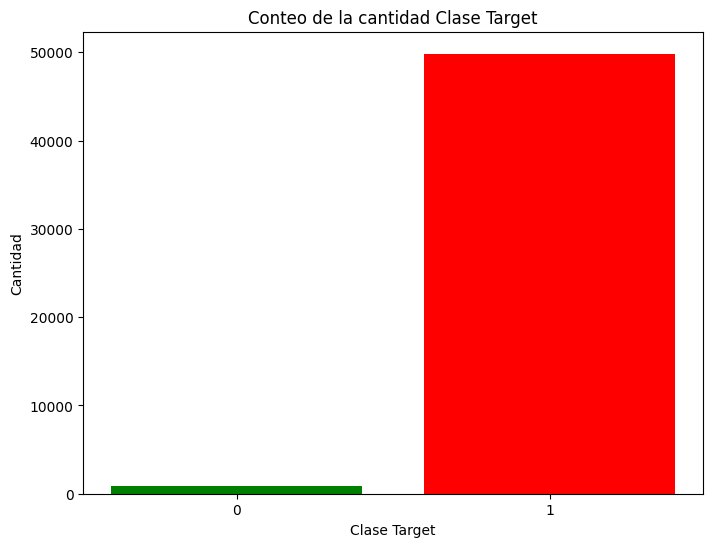

In [48]:
rcParams['figure.figsize'] = 8,6
plt.bar(df_clean['claim'].unique(), df_clean['claim'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Clase Target')
plt.ylabel('Cantidad')
plt.title('Conteo de la cantidad Clase Target')

Las reclamaciones de seguros de viaje de la mayoría de los clientes fueron rechazadas por las agencias de seguros. Sólo se aceptó un número mínimo de reclamaciones de seguros. Esto sugiere que se trata de un conjunto de datos muy desequilibrado que debe equilibrarse más adelante para garantizar que no afecte negativamente al rendimiento de los algoritmos de aprendizaje automático.

In [49]:
df_clean.head(2)

,id,age,agency,agency_type,commision,destination,distribution_channel,duration,gender,net_sales,product_name,claim
0,45341,28,C2B,Airlines,28.13,SINGAPORE,Online,34,F,112.5,Silver Plan,1
1,12958,37,JZI,Airlines,12.95,PHILIPPINES,Online,53,F,37.0,Basic Plan,0


#### Identificación de tipos de Variables

De acuerdo a la exploración del datset podemos distinguir a las variables numéricas y categóricas según las columnas

In [50]:
# Identificar variables numéricas
variables_numericas = ['age', 'commision', 'duration', 'net_sales']

# Identificar variables categóricas  -- 'gender' no se incluye dado que se descarta en el análisis
variables_categoricas = ['agency', 'agency_type', 'destination', 'distribution_channel', 'product_name']

# Imprimir las listas
print("Variables numéricas:", variables_numericas)
print("Variables categóricas:", variables_categoricas)

Variables numéricas: ['age', 'commision', 'duration', 'net_sales']
Variables categóricas: ['agency', 'agency_type', 'destination', 'distribution_channel', 'product_name']


In [51]:
# obtener porcentaje de nulos por campo
porcentaje_nulos = df_clean.isna().sum() / len(df_clean) * 100
porcentaje_nulos

id                       0.000000
age                      0.000000
agency                   0.000000
agency_type              0.000000
commision                0.000000
destination              0.000000
distribution_channel     0.000000
duration                 0.000000
gender                  70.994562
net_sales                0.000000
product_name             0.000000
claim                    0.000000
dtype: float64

De aquí podemos concluir que la variable de genero puede no ser necesaria para el preprocesamiento por lo cual deberíamos removerla dado que no habría forma de completar los datos faltantes

In [52]:
df_clean.drop(columns=['gender'], inplace=True)
df_clean.head(2)

,id,age,agency,agency_type,commision,destination,distribution_channel,duration,net_sales,product_name,claim
0,45341,28,C2B,Airlines,28.13,SINGAPORE,Online,34,112.5,Silver Plan,1
1,12958,37,JZI,Airlines,12.95,PHILIPPINES,Online,53,37.0,Basic Plan,0


#### Determinar si hay valores fuera de rango en atributo numérico

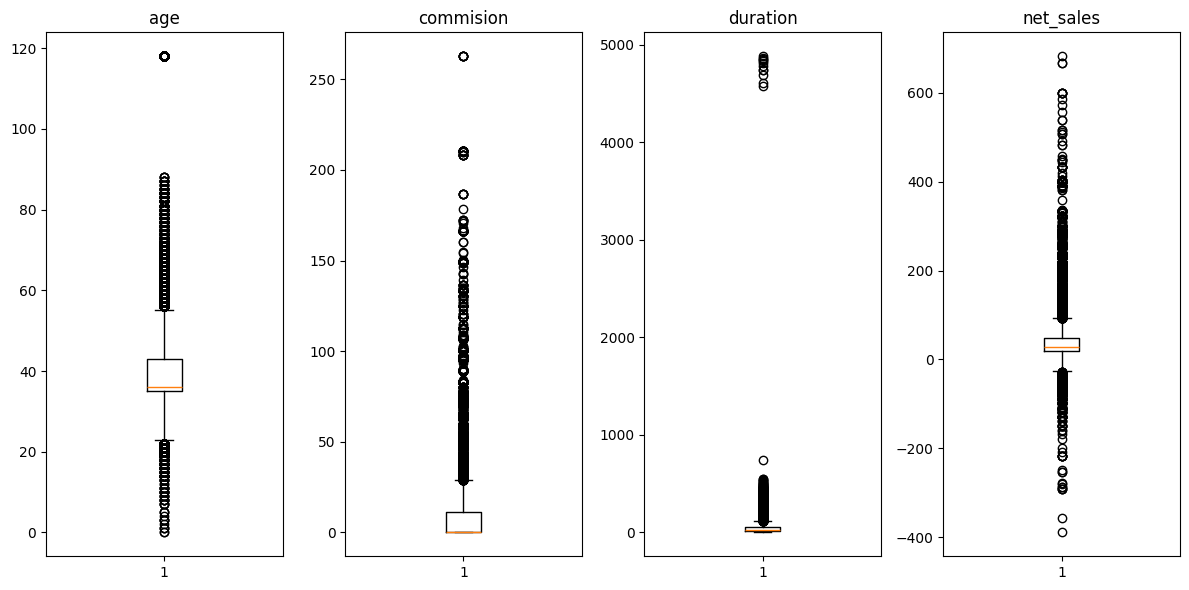

In [53]:
# Crear graficos por cada atributo numerico
fig, axes = plt.subplots(nrows=1, ncols=len(variables_numericas), figsize=(12, 6))

# Generar diagramas de caja para cada atributo numérico
for i, column in enumerate(variables_numericas):
    axes[i].boxplot(df_clean[column])
    axes[i].set_title(column)

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Show the plot
plt.show()

observamos datos fueras de dominio para todos atributos numericos

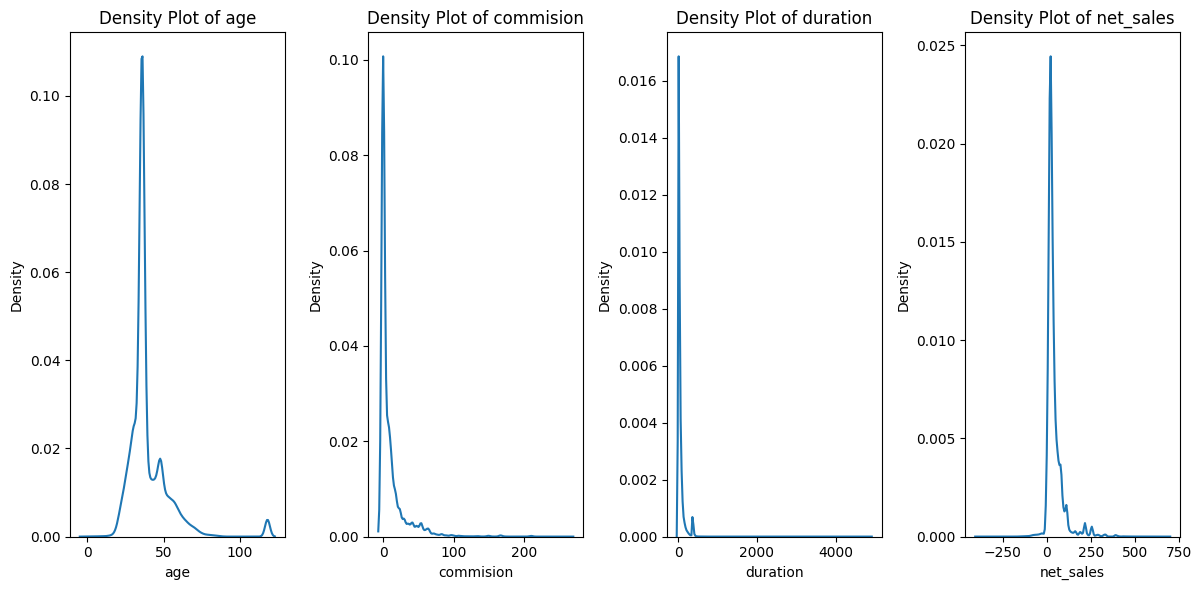

In [54]:
import seaborn as sns

# Create density plots for numeric variables
fig, axes = plt.subplots(nrows=1, ncols=len(variables_numericas), figsize=(12, 6))

# Generate density plots for each numeric variable
for i, column in enumerate(variables_numericas):
    sns.kdeplot(data=df_clean, x=column, ax=axes[i])
    axes[i].set_title(f'Density Plot of {column}')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [55]:
#### Tratamos los valores atípicos

# Calcular los cuantiles 25 y 75
Q1 = df_clean[variables_numericas].quantile(0.25)
Q3 = df_clean[variables_numericas].quantile(0.75)
# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the upper or lower bound
for column in variables_numericas:
    df_clean[column] = np.where(df_clean[column] < lower_bound[column], lower_bound[column], df_clean[column])
    df_clean[column] = np.where(df_clean[column] > upper_bound[column], upper_bound[column], df_clean[column])

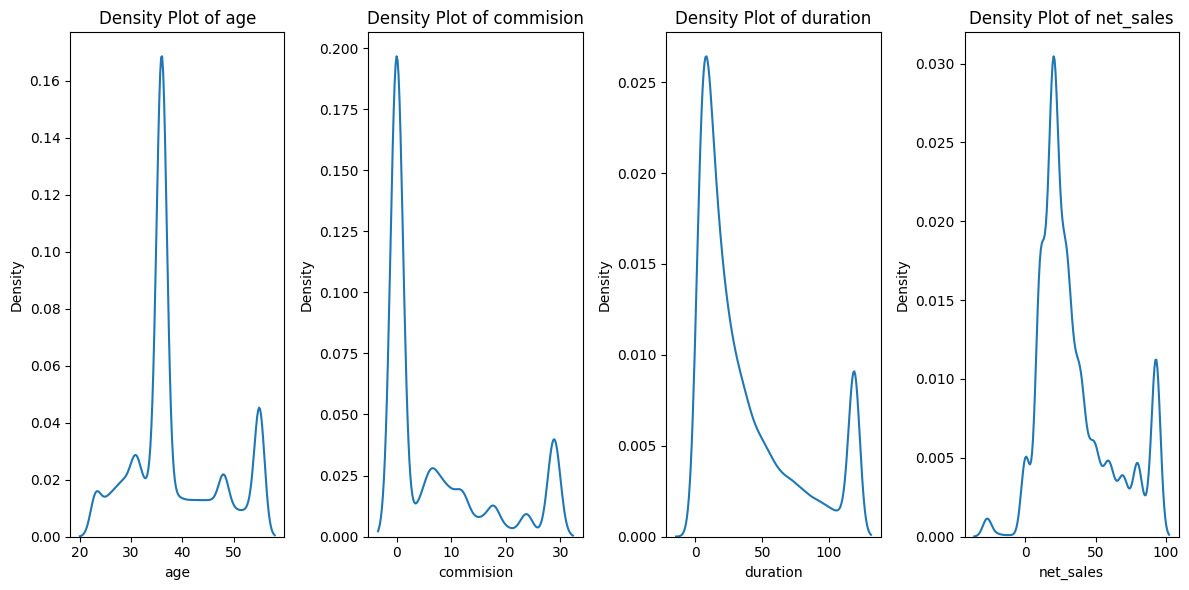

In [56]:
import seaborn as sns

# Create density plots for numeric variables
fig, axes = plt.subplots(nrows=1, ncols=len(variables_numericas), figsize=(12, 6))

# Generate density plots for each numeric variable
for i, column in enumerate(variables_numericas):
    sns.kdeplot(data=df_clean, x=column, ax=axes[i])
    axes[i].set_title(f'Density Plot of {column}')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

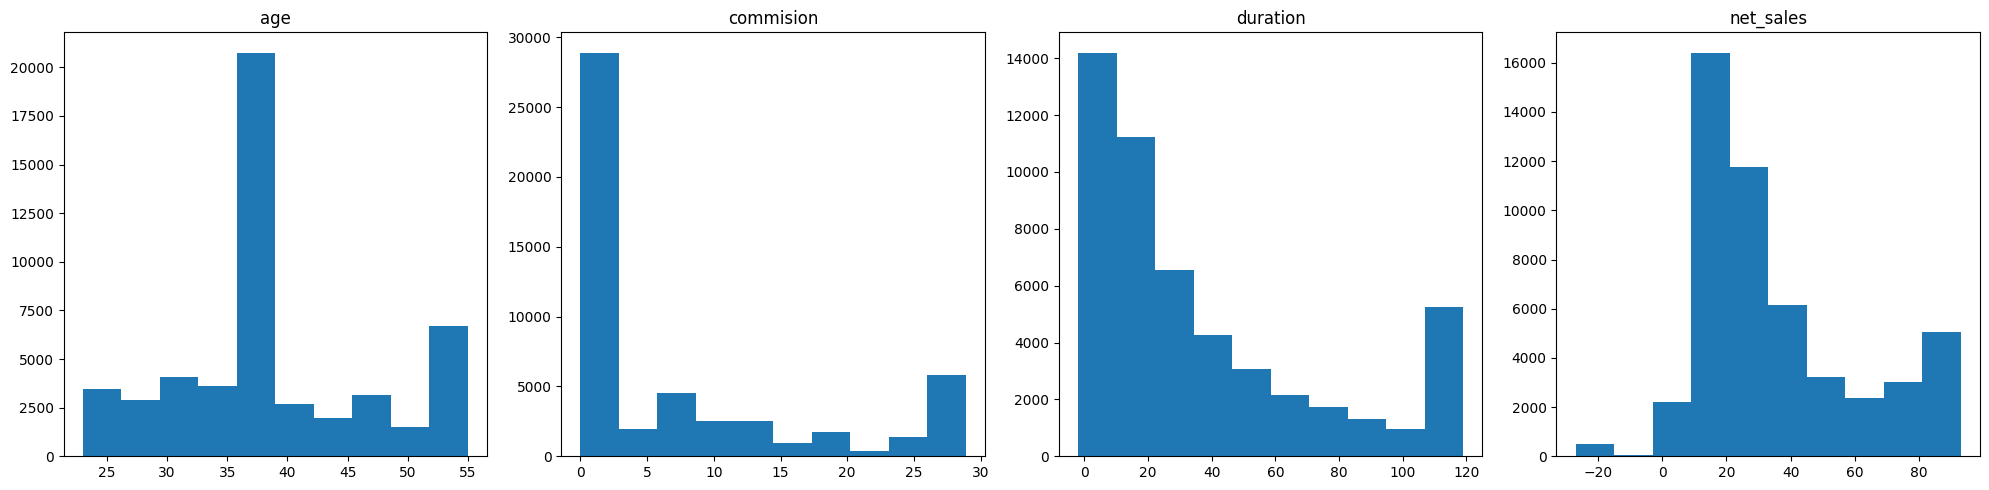

In [57]:
# Crear graficos por cada atributo numerico
fig, axes = plt.subplots(nrows=1, ncols=len(variables_numericas), figsize=(20, 5))

# Generar diagramas de caja para cada atributo numérico
for i, column in enumerate(variables_numericas):
    axes[i].hist(df_clean[column])
    axes[i].set_title(column)

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Show the plot
plt.show()

In [58]:
import plotly.express as px

fig = px.histogram(df_clean, x='duration')
fig.update_layout(title='Histogram of Duration')
fig.show()

#### Mostrar Valores Variables Categoricas

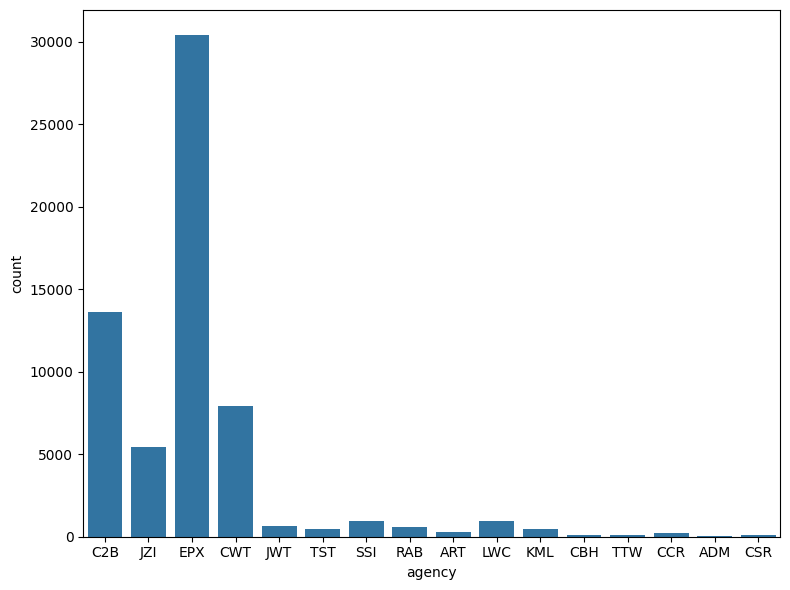

In [59]:
sns.countplot(data=df,x='agency')
plt.tight_layout()

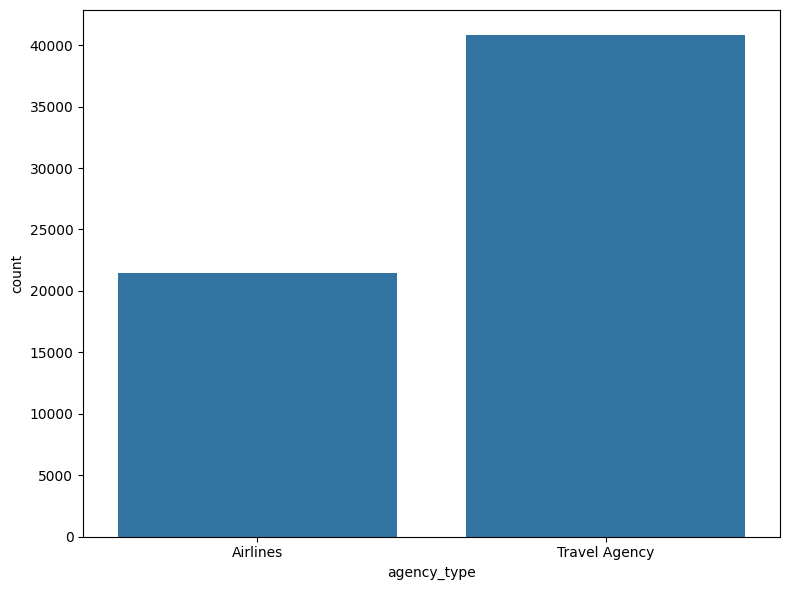

In [60]:
sns.countplot(data=df,x='agency_type')
plt.tight_layout()

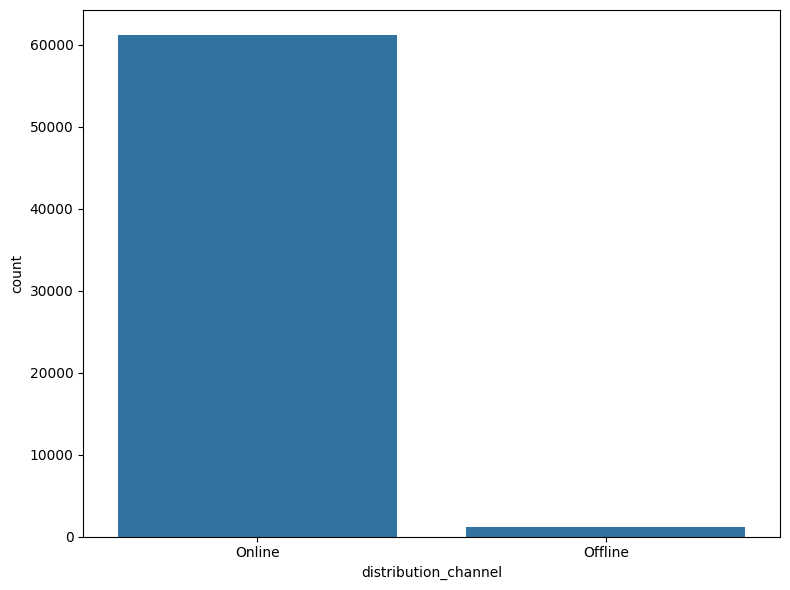

In [61]:
sns.countplot(data=df,x='distribution_channel')
plt.tight_layout()

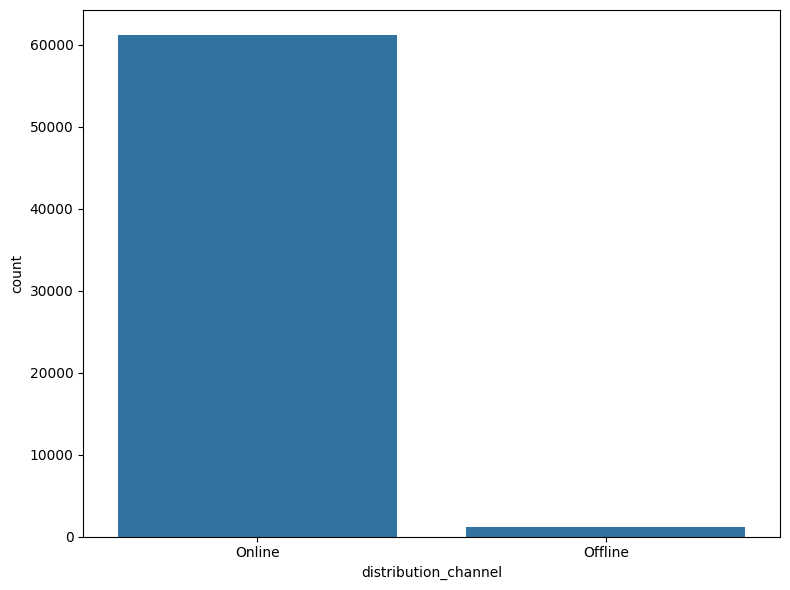

In [62]:
sns.countplot(data=df,x='distribution_channel')
plt.tight_layout()

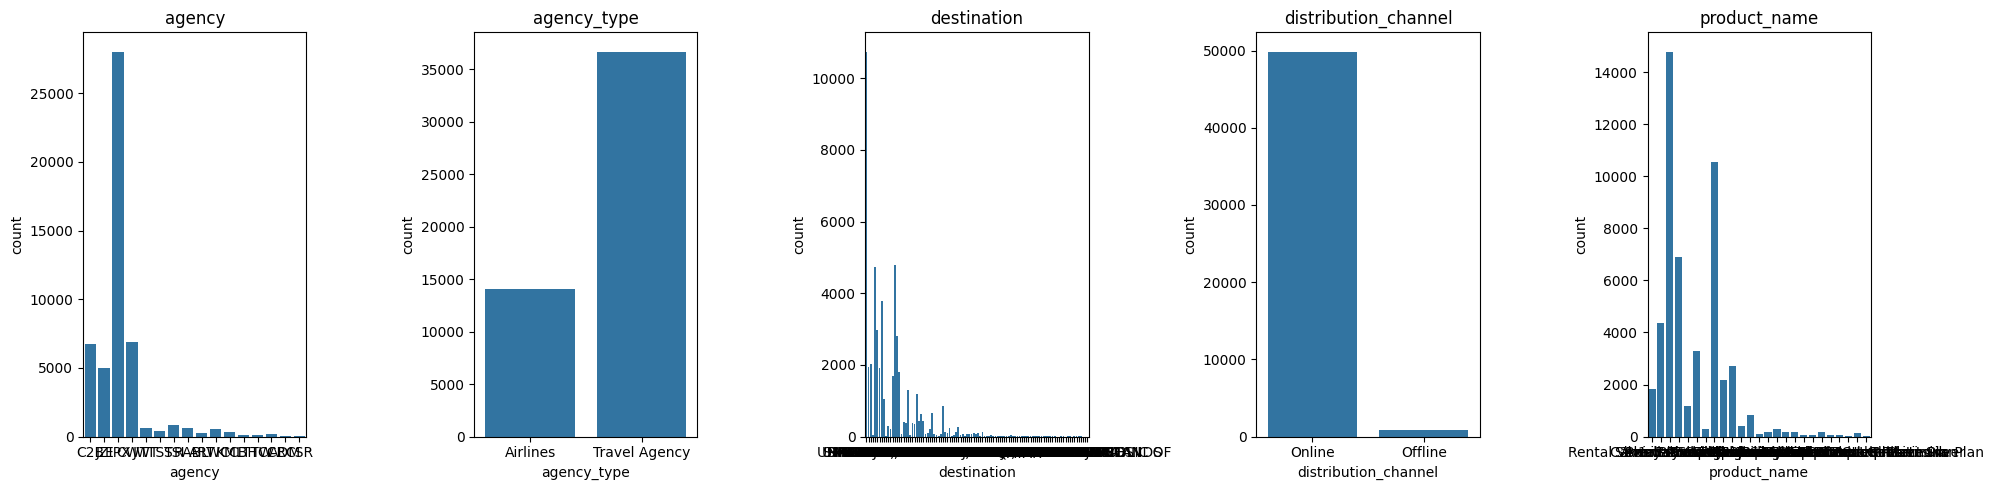

In [63]:
# Crear graficos por cada atributo categórico

fig, axes = plt.subplots(nrows=1, ncols=len(variables_categoricas), figsize=(20, 5))

# Generate plots for each categorical attribute
for i, column in enumerate(variables_categoricas):
    sns.countplot(x=column, data=df_clean, ax=axes[i])
    axes[i].set_title(column)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()



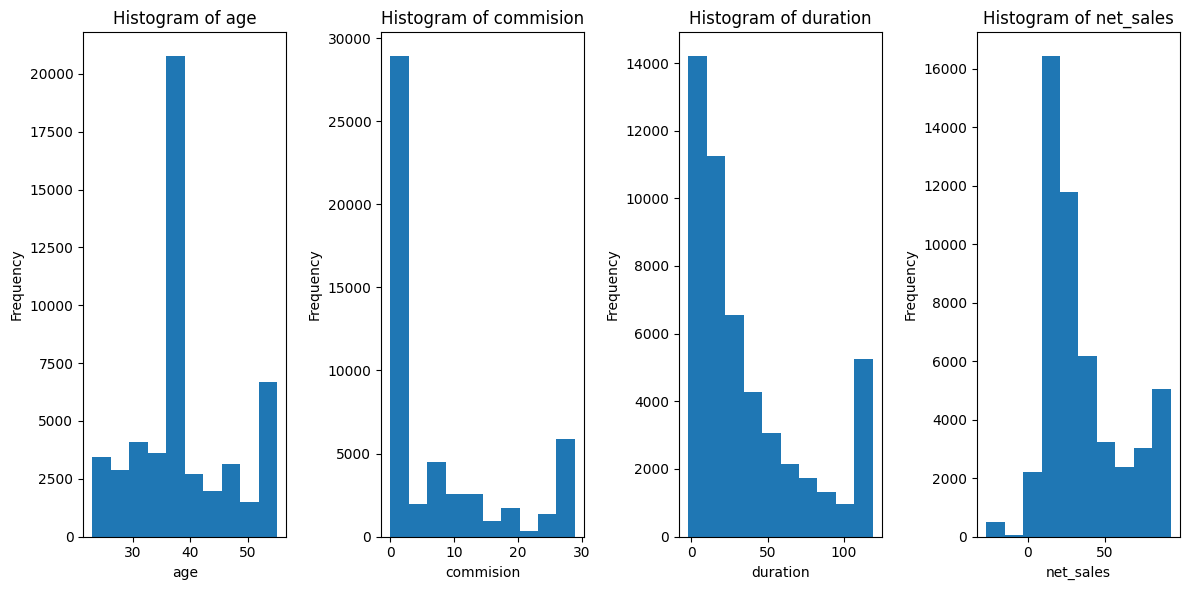

In [64]:
# Generate histograms for numeric columns
fig, axes = plt.subplots(nrows=1, ncols=len(variables_numericas), figsize=(12, 6))

# Generate histograms for each numeric column
for i, column in enumerate(variables_numericas):
    axes[i].hist(df_clean[column], bins=10)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Histogram of {column}')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [65]:


# Estadísticas de la variable categórica 'product_name'
product_name_counts = df_clean['product_name'].value_counts()
print("\nConteo de la variable 'product_name':")
print(product_name_counts)


Conteo de la variable 'product_name':
product_name
Cancellation Plan                       14792
2 way Comprehensive Plan                10550
Rental Vehicle Excess Insurance          6882
Basic Plan                               4364
Bronze Plan                              3291
1 way Comprehensive Plan                 2697
Value Plan                               2171
Silver Plan                              1834
Annual Silver Plan                       1168
Ticket Protector                          844
Travel Cruise Protect                     420
Comprehensive Plan                        302
Gold Plan                                 285
24 Protect                                193
Single Trip Travel Protect Gold           164
Annual Gold Plan                          163
Premier Plan                              157
Single Trip Travel Protect Silver         134
Annual Travel Protect Gold                 85
Annual Travel Protect Silver               71
Individual Comprehensive Pla

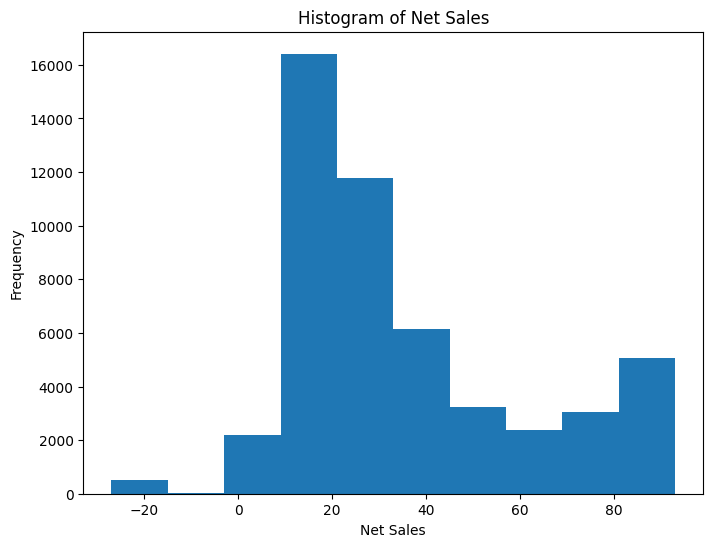

In [66]:
plt.hist(df_clean['net_sales'], bins=10)
plt.xlabel('Net Sales')
plt.ylabel('Frequency')
plt.title('Histogram of Net Sales')
plt.show()